In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

## Read image

1. 首先用 `os.listdir(path)` list all files and dirs under the path
2. 创建一个空的数组
3. 加载图片

```
image = cv2.imread(filename)
image = cv2.resize(filename,(size1,size2))
image = image.transpose(2,0,1)
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_imgs(path:str):
  #Use the os.listdir function to list all files and directories in the provided path (path)
  img_files = os.listdir(path)
  result = []
  for file in img_files:
    #Use os.path.join to combine path and file into a complete file path. This ensures correct access to each file.
    file = os.path.join(path,file)

    #cv2.imread: (read)load image and stored in img
    img = cv2.imread(file)
    print("resize之前的大小",img.shape)
    #resize to 150*150
    img = cv2.resize(img,(150,150))
    #重新排列图像数组的轴。默认图像数据的形状是 (高度, 宽度, 通道数)。这里改变为 (通道数, 高度, 宽度)，这种格式常用于深度学习模型。
    img = img.transpose(2,0,1)
    result.append(img)
    print("resize之后的大小",img.shape)
  return np.array(result)

convolution

In [ ]:
def conv(imgs,kernel):
  # B
  out_channel,in_channel,kernel_h,kernel_w=kernel.shape
  # A
  img_num,_,img_h,img_w=imgs.shape
  # reshape A
  A = kernel.reshape(out_channel,-1)

  c_w = img_w - kernel_w + 1
  c_h = img_h - kernel_h + 1
  # num of cols of A,
  B = np.zeros((img_num,A.shape[1],c_w*c_h))
  # fill B
  for n in range(img_num):
    c = 0
    for h in range(c_h):
      # -> then go down
      for w in range(c_w):
        d=imgs[n,:,h:kernel_h+h,w:kernel_w+w] #:: 这个冒号表示选择所有元素的完整范围。在这里，它被用在第二个维度（channels），意味着所有颜色通道都被选中。
        d = d.reshape(-1)#(-1,1)的话维度不匹配
        #insert to B
        B[n,:,c] = d #（27，）
        c+=1
  result = A@B
  result = result.reshape(img_num,out_channel,c_h,c_w)
  return result

可以改成2个for loop

`:` 对应于 batch_size 和 channels，表示选取所有图像和所有通道。

```
c = 0
for h in range(c_h):
# -> then go down
  for w in range(c_w):
    d=imgs[:,:,h:kernel_h+h,w:kernel_w+w]
    d = d.reshape(img_num,-1)#(-1,1)的话维度不匹配
    #insert to B
    B[:,:,c] = d
    c+=1
```



resize之前的大小 (1080, 1920, 3)
resize之后的大小 (3, 150, 150)
resize之前的大小 (510, 1020, 3)
resize之后的大小 (3, 150, 150)
resize之前的大小 (1599, 2400, 3)
resize之后的大小 (3, 150, 150)
(3, 3, 150, 150)
Kernel shape: (2, 3, 3, 3)
Image shape: (3, 3, 150, 150)


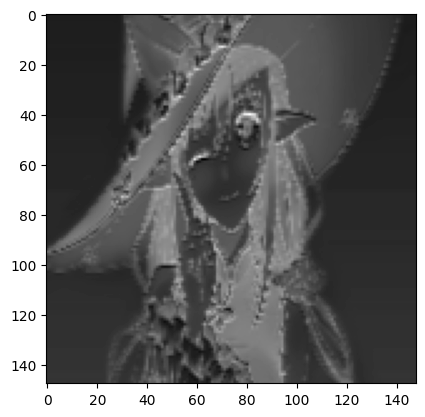

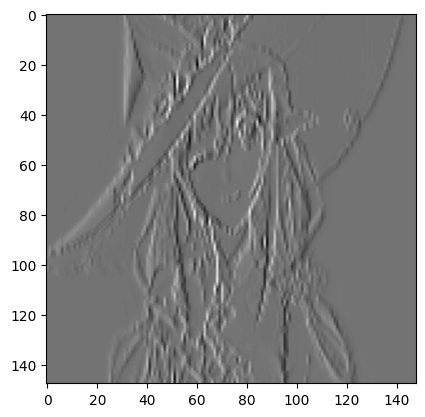

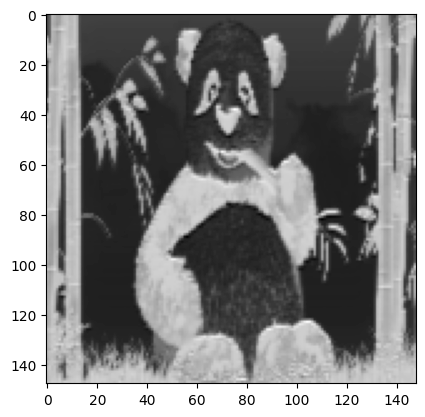

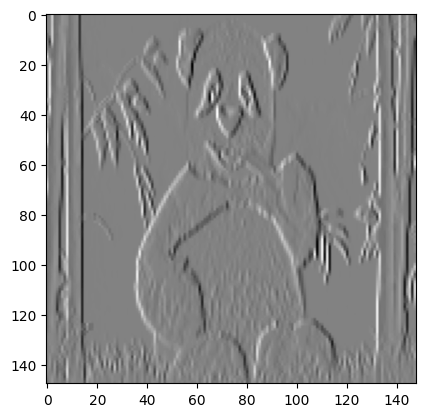

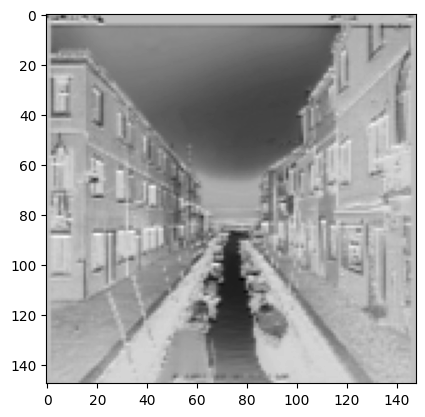

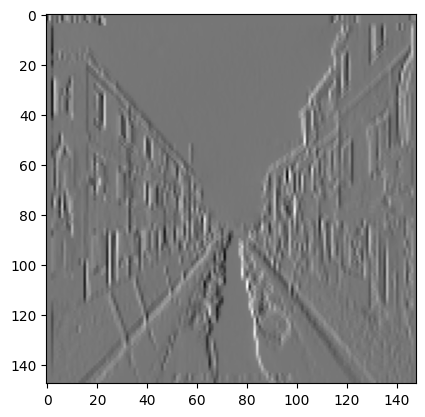

In [ ]:
if __name__ =="__main__":
    kernel = np.array([
        [
          [
            [-1, -2, -3],
            [-1, -2, -3],
            [-1, -10, 1]
          ],
          [
            [0, 3, 3],
            [-1, -2, -3],
            [1, 1, 1]
          ],
          [
            [3, 3, 3],
            [-1, -9, 0],
            [-1, -2, -3]
          ]
        ],
        # 两个卷积和，随便定义
        [
          [
            [1, -1, 0],
            [1, -1, 0],
            [1, -1, 0]
          ],
          [
            [1, -1, 0],
            [1, -1, 0],
            [1, -1, 0]
          ],
          [
            [1, -1, 0],
            [1, -1, 0],
            [1, -1, 0]
          ]
        ],

    ])
    imgs = get_imgs("/content/drive/My Drive/img")
    print(imgs.shape)
    print("Kernel shape:", kernel.shape)
    print("Image shape:", imgs.shape)
    result = conv(imgs,kernel)

    for i in result:
      for j in i:
        #change default color to grey
        plt.imshow(j,cmap="gray")
        plt.show()